In [1]:
#import ....
import pandas as pd
import numpy as np
food =  pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0,low_memory=False)

In [2]:
#Question 1

print("*** \nQ1")

#Finding the tuple containing the number of foods and attributes of the dataset and extracting it
food_num = food.shape[0]
attr_num = food.shape[1]
print(f"Number of foods: {food_num}")
print(f"Number of attributes: {attr_num}\n")

#Creating a DataFrame and getting the attributes and their data types
FoodTable = pd.DataFrame(food)

print(FoodTable.dtypes)
print("***")

*** 
Q1
Number of foods: 5740
Number of attributes: 57

Food ID                                                object
Survey ID                                               int64
Food Name                                              object
Survey flag                                            object
Energy, with dietary fibre (kJ)                         int64
Energy, without dietary fibre (kJ)                      int64
Moisture (g)                                          float64
Protein (g)                                           float64
Total fat (g)                                         float64
Available carbohydrates, with sugar alcohols (g)      float64
Available carbohydrates, without sugar alcohol (g)    float64
Starch (g)                                            float64
Total sugars (g)                                      float64
Added sugars (g)                                      float64
Free sugars (g)                                       float64
Dietary fibre 

In [4]:
#Question 2

print("*** \nQ2")

#Getting the relevant column containing all Magnesium and Moisture values
Mg = FoodTable.loc[:,['Magnesium (Mg) (mg)']]
Moist = FoodTable.loc[:, ['Moisture (g)']]

MedianMg = round(Mg.median(),1)
MeanMst = round(Moist.mean(),1)

print(f"Median value of Magnesium: {MedianMg}\n")
print(f"Mean value of Moisture: {MeanMst}\n***")


*** 
Q2
Median value of Magnesium: Magnesium (Mg) (mg)    22.0
dtype: float64

Mean value of Moisture: Moisture (g)    56.3
dtype: float64
***


In [4]:
#Question 3

# Part a

#Changing the data type using astype
FoodTable['Survey ID'] = FoodTable['Survey ID'].astype(str)
#FoodTable['Survey ID']


# Part b

#Adding a new column using .insert to get the needed data and putting it into the third column position
FoodTable.insert(2, "Food category", FoodTable['Survey ID'].str[:2])

# Part c

#Getting a dictionary of food category frequencies in a dictionary
frequencies = FoodTable['Food category'].value_counts().to_dict()
num13 = frequencies.get('13')

print("***\nQ3")
print(f"% of foods which are Cereal based products and dishes (Food category 13)  = {round(food_num/num13)}")
print("***")


***
Q3
% of foods which are Cereal based products and dishes (Food category 13)  = 6
***


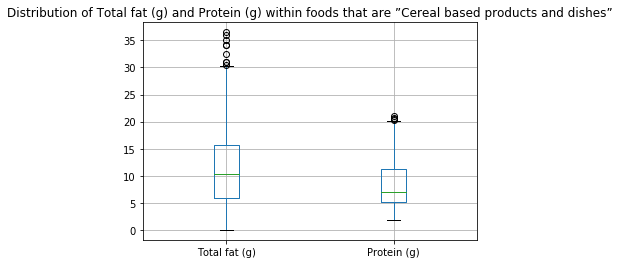

In [13]:
#Question 4

#importing matplotlib to be able to better visualize the plots and use functions such as show
import matplotlib.pyplot as plt

#Creating a new DataFrame to filter out any type of food which is not in 'Cereal based products and dishes'
FoodTable2 = FoodTable.loc[FoodTable['Food category'] == '13']

boxplot = FoodTable2.boxplot(['Total fat (g)','Protein (g)'] )
plt.title('Distribution of Total fat (g) and Protein (g) within foods that are ”Cereal based products and dishes”')
plt.show()


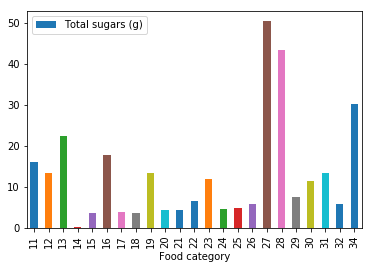

In [6]:
#Question 5

#Grouping the elements by Food Category and the mean of Total sugars
group1 = FoodTable.groupby(['Food category','Total sugars (g)'], as_index=False).mean()

group2 = group1.groupby(['Food category'], as_index=False).mean()
 
#Plotting the bar chart
group2.plot(x='Food category', y='Total sugars (g)', kind='bar')


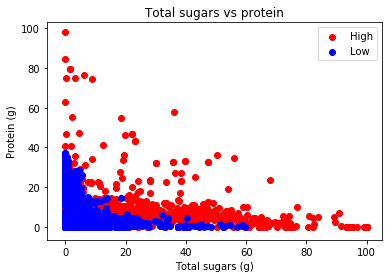

In [7]:
#Question 6

#Part a

FoodTable['EnergyLevel'] = np.where(FoodTable['Energy, with dietary fibre (kJ)'] > 1000, 1, 0)

#Part b

#Creating two different DataFrames to differentiate the High energy and Low energy foods
red = FoodTable.loc[FoodTable['EnergyLevel'] == 1]
blue = FoodTable.loc[FoodTable['EnergyLevel'] == 0]

#Plotting the scatter plot

plt.scatter(red['Total sugars (g)'], red['Protein (g)'], c='r', label='High')
plt.scatter(blue['Total sugars (g)'], blue['Protein (g)'], c='b', label='Low')
plt.xlabel('Total sugars (g)')
plt.ylabel('Protein (g)')
plt.title('Total sugars vs protein')

plt.legend()
plt.show()

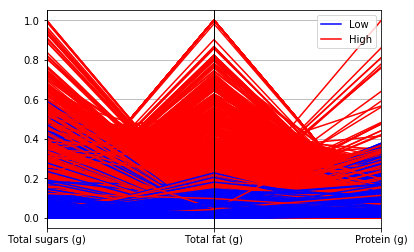

In [9]:
#Question 7

#This library is needed to use the parallel coordinates function
from pandas.plotting import parallel_coordinates

#Part a

NewFoodTable = FoodTable.copy()

#Normalising the data in columns requested columns
NewFoodTable['Protein (g)'] = (NewFoodTable['Protein (g)']-NewFoodTable['Protein (g)'].min())/(NewFoodTable['Protein (g)'].max()-NewFoodTable['Protein (g)'].min())
NewFoodTable['Total fat (g)'] = (NewFoodTable['Total fat (g)']-NewFoodTable['Total fat (g)'].min())/(NewFoodTable['Total fat (g)'].max()-NewFoodTable['Total fat (g)'].min())
NewFoodTable['Total sugars (g)'] = (NewFoodTable['Total sugars (g)']-NewFoodTable['Total sugars (g)'].min())/(NewFoodTable['Total sugars (g)'].max()-NewFoodTable['Total sugars (g)'].min())

#Part b

#Defining the colour
NewFoodTable['selected']=['High' if (x == 1) else 'Low' for x in NewFoodTable['EnergyLevel']]

#colour = np.where(FoodTable['Energy, with dietary fibre (kJ)'] > 1000,'r', 'b')

parallel_coordinates(NewFoodTable[['Total sugars (g)','Total fat (g)','Protein (g)', 'selected']], 'selected', color=["b","r"])
plt.show()




*** 
Q8
1: Dripping, beef 900.8
2: Fat, solid, vegetable oil based 900.8
3: Lard 900.8
4: Shortening, commercial, animal fat (for short pastry, pie bases, tarts and flans) 900.8
5: Ghee, clarified butter 900.3
***


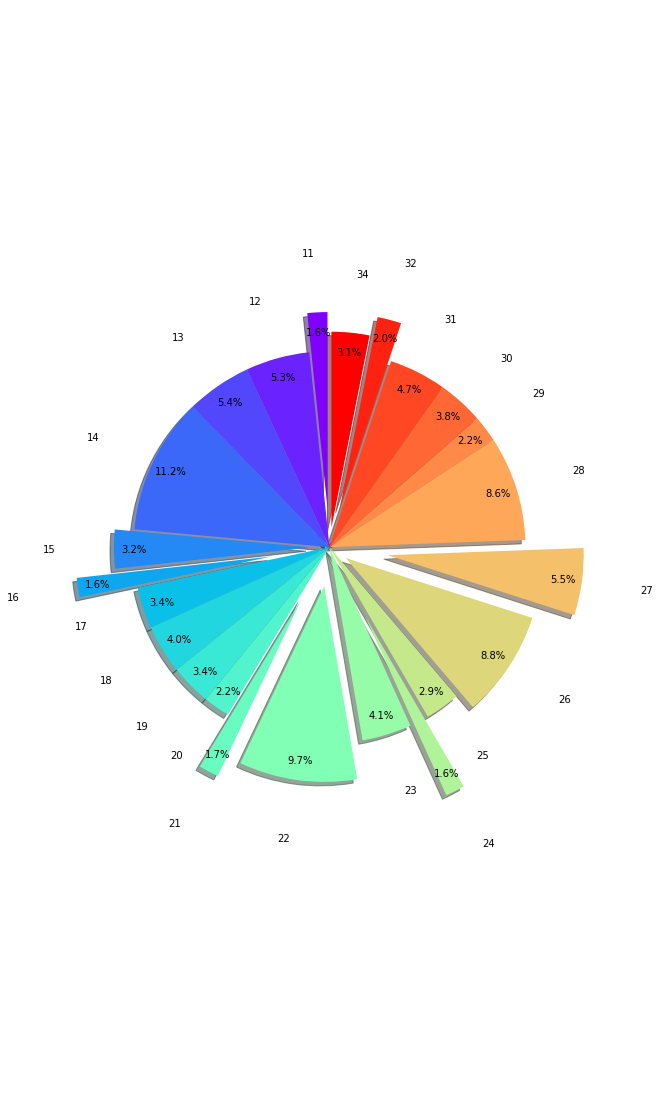

In [11]:
#Question 8


#Part a

#Inserting the calorie_count_per_100g column
FoodTable.insert(4, "calorie_count_per_100g", (4 * FoodTable['Protein (g)']) + (4 * FoodTable['Available carbohydrates, with sugar alcohols (g)']) + (9 * FoodTable['Total fat (g)']) + (7 * FoodTable['Alcohol (g)']))


#Part b

print("*** \nQ8")

#Creating a new DataFrame with the 5 largest calorie foods
CalTable = FoodTable.nlargest(5, 'calorie_count_per_100g')


#Iterating through the DataFrame and printing out the requested information
for i in range (0,5):
    print(f"{i+1}: {CalTable['Food Name'].iloc[i]} {CalTable['calorie_count_per_100g'].iloc[i]:.1f}")

print("***")
          
#Part c

grouping = FoodTable.groupby(['Food category','calorie_count_per_100g'], as_index=False).mean()
          
grouping2 = grouping.groupby('Food category', as_index=False).mean()

#Plotting the pie chart     
explodeTuple = (0.2, 0.0, 0.0, 0.0, 0.1, 0.3, 0.0, 0.0, 0.0, 0.0, 0.3,0.2, 0.0, 0.4, 0.0, 0.1, 0.3, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1)

#Getting the colors using Cmap 
cmap = plt.cm.rainbow
colors = cmap(np.linspace(0., 1., len(grouping2.calorie_count_per_100g)))

fig1, ax1 = plt.subplots(figsize=(10,20))
ax1.pie(grouping2.calorie_count_per_100g, colors=colors, explode=explodeTuple, labels=grouping2['Food category'], autopct='%1.1f%%', shadow=True, startangle=90, pctdistance=0.9, labeldistance=1.3)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

In [12]:
#Question 9

#Part a

health =  pd.read_csv("8i. Australian Health Survey Classification System.csv", header=0,low_memory=False)
names = pd.DataFrame(health)

#Filtering out the new DataFrame by eliminating all Food Group codes that don't have 2 digits
names = names[(names['Food Group Code'] < 100) & (names['Food Group Code'] > 9)]

#Changing the name of the Food group codes to match the Food category column in the initial DataFrame
names = names.rename(columns= {'Food Group Code': 'Food category'})
names['Food category'] = names['Food category'].astype(str)

#Merging the 2 DataFrames into a new one
new_df = FoodTable.merge(names, on='Food category')

#Part b

#This library is needed to use the JSON output format
import json

#Changing the column name to access it
new_df = new_df.rename(columns= {'Food Group and Sub-Group Name': 'Food category name'})

#Cutting the DataFrame into a smaller one which contains needed values
new_df = new_df[['Food category name', 'Total sugars (g)', 'Food category']]

#Grouping the DataFrame by Food category name
grouped = new_df.groupby('Food category name').mean()

#Modifying the column name according to the desired output and rounding the values 
grouped = grouped.rename(columns= {'Total sugars (g)': 'Mean total sugars (g) by category'})
grouped = grouped.round(1)

#Printing the data out in JSON format
grouped = grouped.to_json()
grouped = json.loads(grouped)
print(json.dumps(grouped,sort_keys=True,indent=4))



{
    "Mean total sugars (g) by category": {
        "Alcoholic beverages": 4.9,
        "Cereal based products and dishes": 12.5,
        "Cereals and cereal products": 7.1,
        "Confectionery and cereal/nut/fruit/seed bars": 43.5,
        "Dairy & meat substitutes": 3.7,
        "Egg products and dishes": 1.9,
        "Fats and oils": 0.1,
        "Fish and seafood products and dishes": 0.8,
        "Fruit products and dishes": 14.9,
        "Infant formulae and foods": 5.6,
        "Legume and pulse products and dishes": 3.7,
        "Meat, poultry and game products and dishes ": 0.5,
        "Milk products and dishes": 11.1,
        "Miscellaneous": 7.6,
        "Non-alcoholic beverages": 10.4,
        "Reptiles, amphibia and insects": 8.7,
        "Savoury sauces and condiments": 9.5,
        "Seed and nut products and dishes": 5.4,
        "Snack foods": 4.5,
        "Soup": 3.2,
        "Special dietary foods": 12.5,
        "Sugar products and dishes": 52.6,
        "Vegeta